In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from scipy.misc import imresize
from skimage.data import camera
from scipy.special import cbrt
import skimage

Couldn't import dot_parser, loading of dot files will not be possible.


In [78]:
def distance(pos1, pos2):
    return np.linalg.norm(pos1 - pos2)

def pixel_distance(x1, y1, x2, y2):
    return np.fabs(x1-x2) + np.fabs(y1-y2)

def con_dist(color1, color2, dist, sigma):
    return (1/(color1 - color2)**2)

coffee_img = camera()
coffee_img = imresize(coffee_img, 10)
coffee_img = skimage.color.rgb2gray(coffee_img)


In [49]:
G = nx.Graph()
print G.edges()
for i in range(coffee_img.shape[0]):
    for j in range(coffee_img.shape[1]):
        G.add_node((i,j),x=i,y=j)
THRESHOLD = .9
std = coffee_img.std()
for i in range(coffee_img.shape[0]):
    for j in range(coffee_img.shape[1]):
        for i2 in range(coffee_img.shape[0]):
            for j2 in range(coffee_img.shape[1]):
                if i == i2 and j == j2:
                    continue
                pixel_dist = pixel_distance(i, j, i2, j2)
                close_dist = con_dist(coffee_img[i,j], coffee_img[i2,j2], 
                               pixel_dist, std)
                if pixel_dist <= 4:
                    G.add_edge((i,j), (i2,j2), weight=close_dist)


[]


/Users/aaronkravitz/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: RuntimeWarning: overflow encountered in ubyte_scalars
/Users/aaronkravitz/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: RuntimeWarning: divide by zero encountered in long_scalars


In [83]:
from sklearn.feature_extraction import img_to_graph
numpy_matrix = img_to_graph(coffee_img)
numpy_matrix.data = np.exp(-numpy_matrix.data/numpy_matrix.data.std())

from sklearn.cluster import spectral_clustering, k_means
clusters = spectral_clustering(numpy_matrix, n_clusters=4, eigen_solver='arpack')

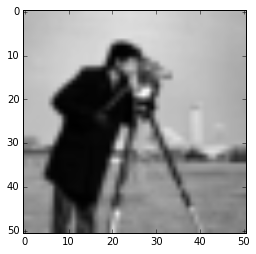

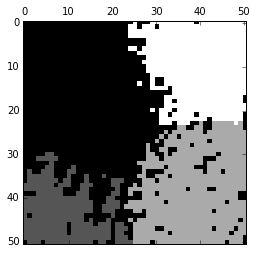

In [84]:
plt.imshow(coffee_img)
plt.matshow(clusters.reshape((coffee_img.shape[0], coffee_img.shape[1])), cmap=plt.gray())


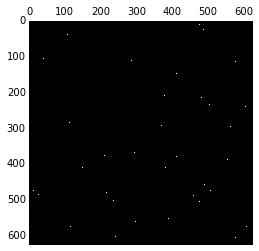

In [39]:
numpy_matrix = nx.to_numpy_matrix(G)

plt.matshow(numpy_matrix, cmap=plt.gray())

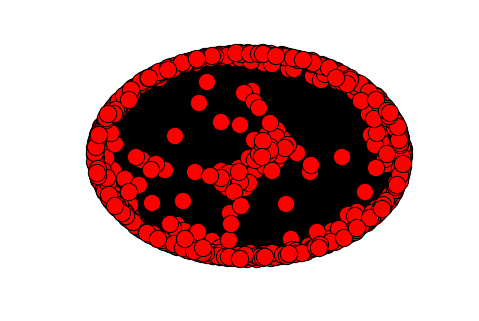

In [44]:
nx.draw(G)